# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline

df_tweets = pd.read_csv('twitter-archive-enhanced.csv')
df_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open('image-predictions.tsv', mode = 'wb') as f:
    f.write(r.content)
r.status_code

200

In [3]:
df_pics = pd.read_csv('image-predictions.tsv', sep = '\t')
df_pics.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import keystone
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

auth = OAuthHandler(keystone.consumer_key, keystone.consumer_secret)
auth.set_access_token(keystone.access_token, keystone.access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

tweet_ids = df_tweets.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


json_tweets = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        json_tweets.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
df_json = pd.DataFrame(json_tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_json.head()

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6878,32918
1,892177421306343426,5180,28449
2,891815181378084864,3423,21377
3,891689557279858688,7087,35886
4,891327558926688256,7600,34321


## Assessing Data


In [5]:
df_tweets.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
362,829449946868879360,NaN,NaN,2017-02-08 22:00:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a stressed doggo. Had a long day. Many ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829449946...,11,10,None,doggo,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
1349,704134088924532736,NaN,NaN,2016-02-29 02:40:23 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This sneezy pupper is just adorable af. 12/10 ...,NaN,NaN,NaN,https://vine.co/v/igW2OEwu9vg,12,10,None,None,None,pupper,None
139,865359393868664832,NaN,NaN,2017-05-19 00:12:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sammy. Her tongue ejects without warni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/865359393...,13,10,Sammy,None,None,None,None
1513,691096613310316544,NaN,NaN,2016-01-24 03:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see one dog giving a puptalk to anothe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691096613...,11,10,None,None,None,None,None
1860,675489971617296384,NaN,NaN,2015-12-12 01:38:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT until we find this dog. Clearly a cool dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675489971...,10,10,None,None,None,None,None
1173,720340705894408192,NaN,NaN,2016-04-13 19:59:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He just got balled on. Can't ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720340705...,10,10,Derek,None,None,pupper,None
817,770772759874076672,NaN,NaN,2016-08-30 23:58:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He's super h*ckin fluffy. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770772759...,11,10,Sebastian,None,None,None,None
2117,670421925039075328,NaN,NaN,2015-11-28 02:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herb. 12/10 https://t.co/tLRyYvCci3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,None,None,None,None


##### Above is a visualization of a random sample of the df_tweets dataframe. I can already see several fields that need cleaning or tidying, such as the timestamp and source fields.

In [6]:
df_tweets.tweet_id.duplicated().sum()

0

##### Checking for duplicate tweets, and there are none.

In [7]:
df_tweets.expanded_urls.duplicated().sum()

137

##### Checking for duplicate tweet URLs, and there are one hundred and thirty-seven.

In [8]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

##### Visualizing the field names and data types

In [9]:
df_tweets.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Visualizing the numerical values

In [10]:
df_tweets.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [11]:
df_tweets.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

##### Visualizing the frequency of unique values among the rating system. There are many values in the rating_numerator field that seem very high. A vast majority of the values in the rating_denominator field are of the same value (10).

In [12]:
df_tweets.query("rating_denominator != 10")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


##### The dataframe is viewed programatically to see those data with values in the rating_denominator field that are not equal to 10.

In [13]:
df_tweets.query("in_reply_to_status_id != 'NaN'")

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


##### This shows the rows of the dataframe where the in_reply_to_status_id has a numerical value. A numerical value in this field means that the tweet was a reply and not an original tweet.

In [14]:
df_tweets.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Bailey         7
Daisy          7
Toby           7
an             7
Buddy          7
Milo           6
Oscar          6
Rusty          6
Bella          6
Dave           6
Stanley        6
Leo            6
Koda           6
Jax            6
Jack           6
Scout          6
Gus            5
            ... 
Gert           1
Gustav         1
Evy            1
Milky          1
Maya           1
Beya           1
Bowie          1
Perry          1
Rorie          1
Banjo          1
Tessa          1
Sojourner      1
Danny          1
Dewey          1
Clifford       1
Bonaparte      1
Adele          1
Blanket        1
DonDon         1
Pete           1
Dante          1
Alejandro      1
Murphy         1
Goliath        1
Gustaf         1
Steve          1
Jeffrie        1
Billy         

##### Checking the frequency of unique names. Values are present that are not names and will need to be cleaned.

In [15]:
df_pics.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,wombat,0.709344,False,koala,0.169758,False,beaver,0.079433,False
419,674038233588723717,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True
1073,716802964044845056,https://pbs.twimg.com/media/CfKYfeBXIAAopp2.jpg,2,malinois,0.619577,True,Leonberg,0.118089,True,bull_mastiff,0.066508,True
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True
182,669351434509529089,https://pbs.twimg.com/media/CUoDk8mWsAAMyBL.jpg,1,cuirass,0.756829,False,breastplate,0.233520,False,bulletproof_vest,0.003812,False
285,671147085991960577,https://pbs.twimg.com/media/CVBktzQXAAAPpUA.jpg,1,Yorkshire_terrier,0.467202,True,cairn,0.440122,True,silky_terrier,0.058690,True
1269,749774190421639168,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,Pekinese,0.879012,True,Chihuahua,0.054855,True,Blenheim_spaniel,0.021041,True
442,674632714662858753,https://pbs.twimg.com/media/CVzG3yOVAAAqi9I.jpg,1,jellyfish,0.432748,False,goldfish,0.113111,False,coral_reef,0.087047,False
1824,835152434251116546,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


##### Visualizing a random sample of the df_pics dataframe, I already notice several values in the p1, p2, and p3 fields that are not dog breeds.

In [16]:
df_pics.tweet_id.duplicated().sum()

0

##### Checking for duplicate tweets, and there are none.

In [17]:
df_pics.jpg_url.duplicated().sum()

66

##### Checking for duplicate JPG URLs, and there are 66.

In [18]:
df_pics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Visualizing the field names and data types

In [19]:
df_pics.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


##### Visualizing the numerical values

In [20]:
df_pics.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Shetland_sheepdog             18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [21]:
df_pics.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
Samoyed                            20
miniature_pinscher                 20
malinois                           20
chow                               20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [22]:
df_pics.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

##### Visualizing the frequency of unique dog breeds (and values that are not dog breeds that will need to be cleaned)

In [23]:
df_json.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6878,32918
1,892177421306343426,5180,28449
2,891815181378084864,3423,21377
3,891689557279858688,7087,35886
4,891327558926688256,7600,34321
5,891087950875897856,2549,17271
6,890971913173991426,1620,10074
7,890729181411237888,15456,55370
8,890609185150312448,3560,23822
9,890240255349198849,5986,27169


##### Visualizing the first twenty rows in the df_json dataframe. Nothing seems out of the ordinary.

In [24]:
df_json.tweet_id.duplicated().sum()

0

##### Checking for duplicate tweets, and there are none.

In [25]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
tweet_id          2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


##### Visualizing the field names and data types

In [26]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,2425.772473,6874.895914
std,6.814903e+16,4106.230083,10677.700336
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,487.000000,1197.000000
50%,7.177900e+17,1127.000000,2983.000000
75%,7.986285e+17,2806.000000,8401.000000
max,8.924206e+17,69420.000000,141775.000000


##### Visualizing the numerical values

In [27]:
df_json.query("retweet_count == 0").count()

tweet_id          1
retweet_count     1
favorite_count    1
dtype: int64

##### Programatically checking for total number of occurrences of zero values in the retweet_count field, and there is only one.

In [28]:
df_json.query("favorite_count == 0").count()

tweet_id          158
retweet_count     158
favorite_count    158
dtype: int64

##### Programatically checking for total number of occurrences of zero values in the favorite_count field, and there are one hundred and fifty-eight.

#### Quality issues

1. While we only need original ratings, there are retweets and replies in the dataset.

2. The numerical values for in_reply_to_status, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are all float types when they should be int types.

3. The information in the source field is in HTML.

4. There are values in the name field that are most likely errors. 

5. While rating_denominator should almost always have a value of 10, there are many values that are inexplicably nowhere near this. Looking at the tweet text, it is evident that many ratings are for entire groups of dogs (10 x the total number of dogs). Many values aren't intended to be ratings at all, but fractions, dates, etc.

6. The values for timestamp are in the incorrect format.

7. The field jpg_url has duplicate entries.

8. There are several values that are not dog breeds.

9. There is inconsistent capitalization in dog breeds. Underscores are unnecessary.

#### Tidiness issues
1. The dataframes df_tweets, df_pics, and df_json should be merged.

2. Some rows do not have images.

3. The fields for dog "stages" should not be standalone.

## Cleaning Data

In [29]:
df_tweets_clean = df_tweets.copy()
df_pics_clean = df_pics.copy()
df_json_clean = df_json.copy()

### Quality Issue #1:
##### While we only need original ratings, there are retweets and replies in the dataset.

#### Define
#####  Only include null values in retweeted_status_id and in_reply_to_status fields using isnull() method.

#### Code

In [30]:
df_tweets_clean = df_tweets_clean[df_tweets_clean.retweeted_status_id.isnull()]

df_tweets_clean = df_tweets_clean[df_tweets_clean.in_reply_to_status_id.isnull()]

In [31]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [32]:
df_tweets_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.097000e+03,0.0,0.0,0.0,0.0,2097.000000,2097.000000
mean,7.365594e+17,NaN,NaN,NaN,NaN,12.189318,10.448736
std,6.710178e+16,NaN,NaN,NaN,NaN,40.364996,6.645061
min,6.660209e+17,NaN,NaN,NaN,NaN,0.000000,2.000000
25%,6.768197e+17,NaN,NaN,NaN,NaN,10.000000,10.000000
50%,7.098528e+17,NaN,NaN,NaN,NaN,11.000000,10.000000
75%,7.877176e+17,NaN,NaN,NaN,NaN,12.000000,10.000000
max,8.924206e+17,NaN,NaN,NaN,NaN,1776.000000,170.000000


### Quality Issue #2:
##### The numerical values for in_reply_to_status, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id are all float types, when they should be int types. Note: This issue is actually no longer an issue, as the numerical values were previously removed. However, a new issue has emerged in that these fields should now be removed entirely.

#### Define
##### Remove entire columns from DataFrame using drop() method.

#### Code

In [33]:
df_tweets_clean.shape

(2097, 17)

In [34]:
df_tweets_clean = df_tweets_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
                                'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

#### Test

In [35]:
df_tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
df_tweets_clean.shape

(2097, 12)

### Quality Issue #3: 
##### The information in the source field is in HTML.

#### Define
##### Use the replace() method to replace HTML code with simple name of tweet source.

#### Code

In [37]:
df_tweets_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [38]:
df_tweets_clean.source = df_tweets_clean.source.replace({'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
                                                         '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene', 
                                                         '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client', 
                                                         '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'})

#### Test

In [39]:
df_tweets_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality Issue #4:
##### There are values in the name field that are most likely errors. It seems as if every real dog name has been capitalized.

#### Define
##### Use iteration to find values beginning with lowercase letters and replace those values with "NaN" values.
##### Use replace() method to change each "None" value in the name field to a "NaN" value.

#### Code

In [40]:
df_tweets_clean.shape[0]

2097

In [41]:
df_tweets_clean.name.value_counts()

None         603
a             55
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Tucker         9
Penny          9
Sadie          8
the            8
Winston        8
Lola           8
Daisy          7
Toby           7
Bella          6
Bailey         6
Jax            6
Koda           6
Stanley        6
an             6
Bo             6
Oscar          6
Milo           5
Louis          5
Scout          5
Bentley        5
Leo            5
Rusty          5
Buddy          5
Dave           5
            ... 
Jiminus        1
Leela          1
Swagger        1
Huck           1
Jamesy         1
Murphy         1
Alejandro      1
Dante          1
Gilbert        1
Maisey         1
Harnold        1
Brutus         1
Cal            1
Eazy           1
Sage           1
Karma          1
Dug            1
Deacon         1
Perry          1
Banjo          1
Sojourner      1
Danny          1
Dewey          1
Clifford       1
Bonaparte      1
Adele          1
Blanket        1
Kaia          

In [42]:
dog_name = df_tweets_clean['name'].astype(str)

lower = []

for i in dog_name:
    if i.islower() == True:
        lower.append(i)

for i in lower:
    df_tweets_clean.replace(i, value = np.nan, inplace = True)

df_tweets_clean['name'].replace(['None'], value = np.nan, inplace = True)

#### Test

In [43]:
df_tweets_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [44]:
df_tweets_clean.shape[0]

2097

In [45]:
df_tweets_clean.name.value_counts()

Charlie      11
Lucy         11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Winston       8
Lola          8
Sadie         8
Toby          7
Daisy         7
Oscar         6
Koda          6
Stanley       6
Jax           6
Bo            6
Bailey        6
Bella         6
Louis         5
Dave          5
Buddy         5
Scout         5
Chester       5
Leo           5
Bentley       5
Rusty         5
Milo          5
Gus           4
Sophie        4
Brody         4
             ..
Timofy        1
Jiminus       1
Leela         1
Swagger       1
Jamesy        1
Murphy        1
Maisey        1
Alejandro     1
Harnold       1
Brutus        1
Cal           1
Eazy          1
Sage          1
Karma         1
Dug           1
Deacon        1
Perry         1
Banjo         1
Sojourner     1
Danny         1
Dewey         1
Clifford      1
Bonaparte     1
Adele         1
Blanket       1
Kaia          1
DonDon        1
Fiji          1
Dante         1
Gidget        1
Name: name, Length: 929,

### Quality Issue #4:
##### While rating_denominator should almost always have a value of 10, there are many values that are inexplicably nowhere near this. Looking at the tweet text, it is evident that many ratings are for entire groups of dogs (10 multiplied by the total number of dogs in the group). Many values aren't intended to be ratings at all, but fractions, dates, etc. 

#### Define
##### Drop all entries with rating_denominator that is not 10.

#### Code

In [46]:
df_tweets_clean.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [47]:
not_10 = df_tweets_clean[(df_tweets_clean['rating_denominator'] != 10)].index
df_tweets_clean.drop(not_10, inplace = True)

#### Test

In [48]:
df_tweets_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Quality Issue #5:
##### The values for timestamp are in the incorrect format.

#### Define
##### Use the to_datetime() method to convert timestamp from type str to type datetime.

#### Code

In [49]:
df_tweets_clean.timestamp.sample(10)

1678    2015-12-30 03:55:29 +0000
2282    2015-11-19 05:24:37 +0000
1477    2016-01-31 02:31:43 +0000
1279    2016-03-13 02:43:08 +0000
1851    2015-12-12 16:16:45 +0000
2073    2015-11-29 16:01:20 +0000
2168    2015-11-25 03:18:15 +0000
1556    2016-01-17 21:01:41 +0000
1324    2016-03-05 17:26:40 +0000
738     2016-09-27 16:06:28 +0000
Name: timestamp, dtype: object

In [50]:
df_tweets_clean.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [51]:
df_tweets_clean.timestamp = pd.to_datetime(df_tweets_clean.timestamp)

#### Test

In [52]:
df_tweets_clean.timestamp.sample(10)

43     2017-07-09 21:29:42
1075   2016-06-06 01:02:55
276    2017-03-11 18:35:42
1363   2016-02-25 19:04:13
1841   2015-12-13 03:21:34
2313   2015-11-17 22:06:57
1247   2016-03-20 20:36:28
1246   2016-03-20 23:23:54
2084   2015-11-29 03:33:17
1332   2016-03-03 19:32:29
Name: timestamp, dtype: datetime64[ns]

In [53]:
df_tweets_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

### Quality Issue #6:
##### The field jpg_url has duplicate entries.

#### Define
##### Use the drop_duplicates method to remove duplicate entries in jpg_url field.

#### Code

In [54]:
df_pics_clean.jpg_url.duplicated().sum()

66

In [55]:
df_pics_clean.jpg_url.shape[0]

2075

In [56]:
df_pics_clean.drop_duplicates(subset = 'jpg_url', inplace = True)

#### Test

In [57]:
df_pics_clean.jpg_url.duplicated().sum()

0

In [58]:
df_pics_clean.jpg_url.shape[0]

2009

### Quality Issue #7:
##### There are several values that are not dog breeds.

#### Define
##### Create a function to only include image predictions that have identified dog breeds. Include image prediction confidence levels. Create new fields for dog breeds and image prediction confidence levels.

#### Code

In [59]:
df_pics_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [60]:
breed = []
confidence_level = []

def pic_prediction(df_pics_clean):
    #When applied will only include image predictions that have identified dog breeds in the dataframe
    #Will include image prediction confidence levels in the dataframe

    if df_pics_clean.p1_dog == True:
        breed.append(df_pics_clean.p1)
        confidence_level.append(df_pics_clean.p1_conf)
    elif df_pics_clean.p2_dog == True:
        breed.append(df_pics_clean.p2)
        confidence_level.append(df_pics_clean.p2_conf)
    elif df_pics_clean.p3_dog == True:
        breed.append(df_pics_clean.p3)
        confidence_level.append(df_pics_clean.p3_conf)
    else:
        breed.append('None')
        confidence_level.append(0)
           
df_pics_clean.apply(pic_prediction, axis=1)
df_pics_clean['breed'] = breed
df_pics_clean['confidence_level'] = confidence_level
df_pics_clean = df_pics_clean[df_pics_clean.breed != 'None']
df_pics_clean = df_pics_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis = 1)

#### Test

In [61]:
df_pics_clean.head()

,tweet_id,jpg_url,breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


### Quality Issue #8:
##### There is inconsistent capitalization in dog breeds. Underscores are unnecessary.

#### Define
##### Use str.replace to change underscores to spaces. 
##### Use str.title to capitalize every first letter in breed field.

#### Code

In [62]:
df_pics_clean.breed.head()

0    Welsh_springer_spaniel
1                   redbone
2           German_shepherd
3       Rhodesian_ridgeback
4        miniature_pinscher
Name: breed, dtype: object

In [63]:
df_pics_clean.breed = df_pics_clean.breed.str.replace('_', ' ')
df_pics_clean.breed = df_pics_clean.breed.str.title()

#### Test

In [64]:
df_pics_clean.breed.head()

0    Welsh Springer Spaniel
1                   Redbone
2           German Shepherd
3       Rhodesian Ridgeback
4        Miniature Pinscher
Name: breed, dtype: object

### Tidiness Issue #1:
##### The dataframes df_tweets, df_pics, and df_json should be merged.

#### Define
##### Use merge method to combine dataframes.

#### Code

In [65]:
df_tweets_clean.shape[1]

12

In [66]:
df_tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [67]:
df_tweets_clean = pd.merge(df_tweets_clean, df_pics_clean, on = ['tweet_id'], how = 'left')

df_tweets_clean = pd.merge(df_tweets_clean, df_json_clean, on = ['tweet_id'], how = 'left')

In [68]:
df_tweets_clean.shape[1]

17

In [69]:
df_tweets_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,breed,confidence_level,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN,NaN,NaN,6878.0,32918.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,5180.0,28449.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,3423.0,21377.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086,7087.0,35886.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,7600.0,34321.0


### Tidiness Issue #2:
##### Some rows do not have images.

#### Define
##### Remove rows not containing images by using the notnull() method as a filter.

#### Code

In [70]:
df_tweets_clean.jpg_url.isnull().sum()

430

In [71]:
df_tweets_clean = df_tweets_clean[df_tweets_clean.jpg_url.notnull()]

#### Test

In [72]:
df_tweets_clean.jpg_url.isnull().sum()

0

### Tidiness Issue #3:
##### The fields for dog "stages" should not be standalone.

#### Define
##### Use the melt() method to combine dog stages into one field.

#### Code

In [73]:
df_tweets_clean = pd.melt(df_tweets_clean, 
                                id_vars = ['tweet_id', 'timestamp', 'source',  'expanded_urls', 'name', 'breed', 'text', 'jpg_url', 
                                           'rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'type', 
                                value_name = 'dog_stage')

df_tweets_clean.drop('type', 1, inplace = True)
df_tweets_clean = df_tweets_clean.sort_values('dog_stage').drop_duplicates(subset = 'tweet_id', keep = 'last')

#### Test

In [74]:
df_tweets_clean.dog_stage.value_counts()

None       1393
pupper      173
doggo        54
puppo        22
floofer       8
Name: dog_stage, dtype: int64

In [75]:
df_tweets_clean.sample(10)

,tweet_id,timestamp,source,expanded_urls,name,breed,text,jpg_url,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_stage
3003,673686845050527744,2015-12-07 02:13:55,Twitter for iPhone,https://twitter.com/dog_rates/status/673686845...,George,Pekinese,This is George. He's upset that the 4th of Jul...,https://pbs.twimg.com/media/CVlqi_AXIAASlcD.jpg,11,10,365.0,1249.0,None
3043,672466075045466113,2015-12-03 17:23:00,Twitter for iPhone,https://twitter.com/dog_rates/status/672466075...,Franq,Cocker Spaniel,This is Franq and Pablo. They're working hard ...,https://pbs.twimg.com/media/CVUUU_EWoAAxABV.jpg,12,10,437.0,1166.0,None
2457,717047459982213120,2016-04-04 17:53:31,Twitter for iPhone,https://twitter.com/dog_rates/status/717047459...,Flávio,Golden Retriever,This is Flávio (pronounced Baxter). He's a Ben...,https://pbs.twimg.com/media/CfN23ArXEAEkZkz.jpg,12,10,1709.0,5645.0,None
2054,793962221541933056,2016-11-02 23:45:19,Twitter for iPhone,https://twitter.com/dog_rates/status/793962221...,Maximus,Labrador Retriever,This is Maximus. His face is stuck like that. ...,https://pbs.twimg.com/media/CwS4aqZXUAAe3IO.jpg,12,10,4503.0,15521.0,None
3114,670676092097810432,2015-11-28 18:50:15,Twitter for iPhone,https://twitter.com/dog_rates/status/670676092...,Bloo,Dandie Dinmont,This is Bloo. He's a Westminster Cîroc. Doesn'...,https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg,8,10,35.0,211.0,None
4395,686377065986265092,2016-01-11 02:40:19,Twitter for iPhone,https://twitter.com/dog_rates/status/686377065...,Birf,German Shepherd,Meet Birf. He thinks he's gone blind. 10/10 ve...,https://pbs.twimg.com/media/CYaAS2kUoAINkye.jpg,10,10,502.0,2003.0,pupper
1757,863553081350529029,2017-05-14 00:34:33,Twitter for iPhone,https://twitter.com/dog_rates/status/863553081...,Neptune,Eskimo Dog,This is Neptune. He's a backpup vocalist for t...,https://pbs.twimg.com/ext_tw_video_thumb/86355...,13,10,3572.0,13295.0,None
2042,796865951799083009,2016-11-11 00:03:42,Twitter for iPhone,https://twitter.com/dog_rates/status/796865951...,Tyr,Cardigan,This is Tyr. He's just checking on you. Nifty ...,https://pbs.twimg.com/media/Cw8JWZ2UsAAJOZ6.jpg,12,10,1810.0,7129.0,None
1648,666029285002620928,2015-11-15 23:05:30,Twitter for iPhone,https://twitter.com/dog_rates/status/666029285...,NaN,Redbone,This is a western brown Mitsubishi terrier. Up...,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,7,10,39.0,111.0,None
1789,853760880890318849,2017-04-17 00:03:50,Twitter for iPhone,https://twitter.com/dog_rates/status/853760880...,Alice,Miniature Pinscher,Say hello to Alice. I'm told she enjoys car ri...,https://pbs.twimg.com/media/C9kq_bbVwAAuRZd.jpg,12,10,5037.0,25368.0,None


### Unforeseen Quality Issue:
##### The values in favorite_count and retweet_count are now float types when they should be int types.

#### Define
##### Change favorite_count and retweet_count float types back to int types using astype() method.

#### Code

In [76]:
df_json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6878,32918
1,892177421306343426,5180,28449
2,891815181378084864,3423,21377
3,891689557279858688,7087,35886
4,891327558926688256,7600,34321


In [77]:
df_tweets_clean.head()

,tweet_id,timestamp,source,expanded_urls,name,breed,text,jpg_url,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_stage
1585,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,https://twitter.com/dog_rates/status/667455448...,Reese,Tibetan Terrier,This is Reese and Twips. Reese protects Twips....,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,7,10,53.0,167.0,None
1584,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,https://twitter.com/dog_rates/status/667470559...,NaN,Toy Poodle,This is a northern Wahoo named Kohl. He runs t...,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,11,10,85.0,222.0,None
1583,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,https://twitter.com/dog_rates/status/667491009...,NaN,Borzoi,Two dogs in this one. Both are rare Jujitsu Py...,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,7,10,187.0,447.0,None
1582,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,https://twitter.com/dog_rates/status/667495797...,Philippe,Chihuahua,This is Philippe from Soviet Russia. Commandin...,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,9,10,227.0,444.0,None
1581,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,https://twitter.com/dog_rates/status/667502640...,Hall,Labrador Retriever,Say hello to Hall and Oates. Oates is winking ...,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,11,10,192.0,475.0,None


In [78]:
df_tweets_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
expanded_urls                 object
name                          object
breed                         object
text                          object
jpg_url                       object
rating_numerator               int64
rating_denominator             int64
retweet_count                float64
favorite_count               float64
dog_stage                     object
dtype: object

In [79]:
counts = df_tweets_clean[['retweet_count', 'favorite_count']]
counts.sample(5)

,retweet_count,favorite_count
2830,652.0,2097.0
1605,46.0,190.0
2911,458.0,1339.0
2304,595.0,1996.0
3003,365.0,1249.0


In [80]:
df_tweets_clean = df_tweets_clean.fillna(0)
df_tweets_clean = df_tweets_clean.astype({"retweet_count":'int', "favorite_count":'int'}) 

#### Test

In [81]:
df_tweets_clean.dtypes

tweet_id                       int64
timestamp             datetime64[ns]
source                        object
expanded_urls                 object
name                          object
breed                         object
text                          object
jpg_url                       object
rating_numerator               int64
rating_denominator             int64
retweet_count                  int64
favorite_count                 int64
dog_stage                     object
dtype: object

In [82]:
counts = df_tweets_clean[['retweet_count', 'favorite_count']]
counts.sample(5)

,retweet_count,favorite_count
1995,2421,10151
2257,0,0
1587,75,264
1926,2075,12104
2293,1185,4237


In [83]:
df_tweets_clean.head()

,tweet_id,timestamp,source,expanded_urls,name,breed,text,jpg_url,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_stage
1585,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,https://twitter.com/dog_rates/status/667455448...,Reese,Tibetan Terrier,This is Reese and Twips. Reese protects Twips....,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,7,10,53,167,None
1584,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,https://twitter.com/dog_rates/status/667470559...,0,Toy Poodle,This is a northern Wahoo named Kohl. He runs t...,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,11,10,85,222,None
1583,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,https://twitter.com/dog_rates/status/667491009...,0,Borzoi,Two dogs in this one. Both are rare Jujitsu Py...,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,7,10,187,447,None
1582,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,https://twitter.com/dog_rates/status/667495797...,Philippe,Chihuahua,This is Philippe from Soviet Russia. Commandin...,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,9,10,227,444,None
1581,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,https://twitter.com/dog_rates/status/667502640...,Hall,Labrador Retriever,Say hello to Hall and Oates. Oates is winking ...,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,11,10,192,475,None


### Unforeseen Tidiness Issues:
##### Index values are out of order. Zero values in name field.

#### Define
##### Use reset_index() method to reorganize index. User replace() method to replace zero values in name field with "N/A" since they are not available.

#### Code

In [84]:
df_tweets_clean = df_tweets_clean.reset_index(drop = True)

In [85]:
df_tweets_clean['name'].replace([0], 'N/A', inplace=True)

#### Test

In [86]:
df_tweets_clean.head()

,tweet_id,timestamp,source,expanded_urls,name,breed,text,jpg_url,rating_numerator,rating_denominator,retweet_count,favorite_count,dog_stage
0,667455448082227200,2015-11-19 21:32:34,Twitter Web Client,https://twitter.com/dog_rates/status/667455448...,Reese,Tibetan Terrier,This is Reese and Twips. Reese protects Twips....,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,7,10,53,167,None
1,667470559035432960,2015-11-19 22:32:36,Twitter Web Client,https://twitter.com/dog_rates/status/667470559...,N/A,Toy Poodle,This is a northern Wahoo named Kohl. He runs t...,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,11,10,85,222,None
2,667491009379606528,2015-11-19 23:53:52,Twitter Web Client,https://twitter.com/dog_rates/status/667491009...,N/A,Borzoi,Two dogs in this one. Both are rare Jujitsu Py...,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,7,10,187,447,None
3,667495797102141441,2015-11-20 00:12:54,Twitter Web Client,https://twitter.com/dog_rates/status/667495797...,Philippe,Chihuahua,This is Philippe from Soviet Russia. Commandin...,https://pbs.twimg.com/media/CUNr4-7UwAAg2lq.jpg,9,10,227,444,None
4,667502640335572993,2015-11-20 00:40:05,Twitter Web Client,https://twitter.com/dog_rates/status/667502640...,Hall,Labrador Retriever,Say hello to Hall and Oates. Oates is winking ...,https://pbs.twimg.com/media/CUNyHTMUYAAQVch.jpg,11,10,192,475,None


## Storing Data

In [87]:
df_tweets_clean.to_csv('twitter_archive_master.csv', index = False)

df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

### Insights:
1. Average rating and distribution of dog stages

2. Top 10 breeds rated by the following:
    -  Average numerator rating
    -  Total retweets
    -  Total favorites
    

3. URLs with pictures of the top 5 individual dogs by total number of favorites

#### 1a. Average rating of dog stages

In [88]:
df1 = df[df.dog_stage != 'None']

In [89]:
stage_average = df1.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending = False)
stage_average

dog_stage
puppo      12.000000
doggo      11.925926
floofer    11.875000
pupper     10.971098
Name: rating_numerator, dtype: float64

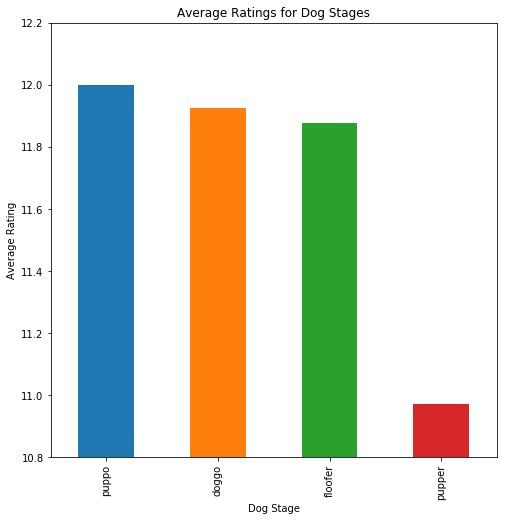

In [90]:
stage_average.plot(kind='bar', x='breed', y='avg_rating', figsize = (8, 8))  
plt.title('Average Ratings for Dog Stages')
plt.ylim(10.8, 12.2)
plt.ylabel("Average Rating")
plt.xlabel("Dog Stage");

Here we can see that the average rating for puppos is a 12.0, with the average ratings for doggos and floofers close behind at just above and below an 11.9, respectively. Relatively far behind them is the average rating for puppers, at just below an 11.0. 

#### 1b. Distribution of dog stages

In [91]:
df1['dog_stage'].value_counts()

pupper     173
doggo       54
puppo       22
floofer      8
Name: dog_stage, dtype: int64

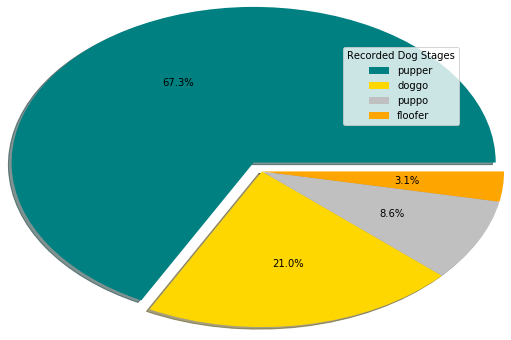

In [92]:
labels = ['pupper', 'doggo', 'puppo', 'floofer']
values = df1.dog_stage.value_counts(normalize=True)
colors = ['#008080', '#FFD700', '#C0C0C0', '#FFA500']
myexplode = (0.1, 0, 0, 0)

plt.pie(values, colors=colors, explode = myexplode, autopct='%1.1f%%', shadow=True, radius = 1.5)
plt.legend(labels, loc=0, title = "Recorded Dog Stages")
plt.tight_layout()

Puppers make up over two-thirds of the characterized dogs in the data set. Doggos make up twenty-one percent of the dog stages, while puppos make up less than nine percent. Just over three percent of the dogs were characterized as floofers. It's interesting to note that although most of the reviews are of puppers, the pupper dog stage scores nearly an entire point lower on average than any other stage. This could be because of pupper bias by WeRateDogs, but is more likely due to a larger sample size. This larger sample size could stem from WeRateDogs choosing to mostly review the user-submitted dogs that are puppers or from the likelihood that most user submissions are puppers. It is unclear from the data provided, however.

#### 2. Top 10 breeds by total number of reviews

In [93]:
df['breed'].value_counts().head(10)

Golden Retriever      153
Labrador Retriever    103
Pembroke               94
Chihuahua              89
Pug                    62
Toy Poodle             50
Chow                   47
Samoyed                42
Pomeranian             41
Malamute               33
Name: breed, dtype: int64

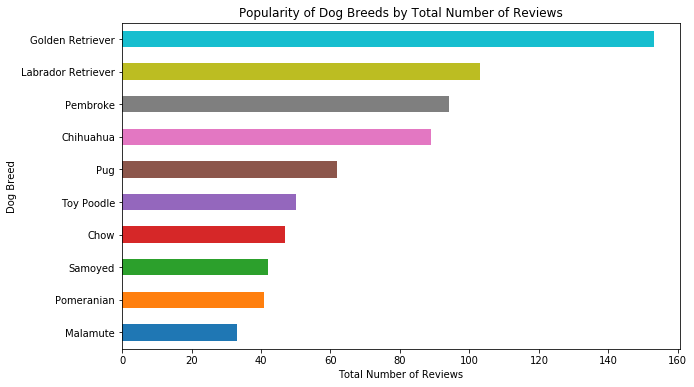

In [94]:
most_breed_reviews = df.breed.value_counts()[:10].sort_values()
most_breed_reviews.plot(kind = 'barh', title = 'Popularity of Dog Breeds by Total Number of Reviews', figsize = (10, 6))
plt.xlabel('Total Number of Reviews')
plt.ylabel('Dog Breed');

The most popular dog breeds by total number of WeRateDogs reviews are as follows:
1. Golden Retriever
2. Labrador Retriever
3. Pembroke
4. Chihuahua
5. Pug
6. Toy Poodle
7. Chow
8. Samoyed
9. Pomeranian
10. Malamute

Now we can use this data for comparison.

#### 3. Top 10 breeds by total number of retweets

In [95]:
most_breed_rts = df.groupby('breed')['retweet_count'].sum().sort_values(ascending = False).head(10)
most_breed_rts

breed
Golden Retriever      453594
Labrador Retriever    301624
Pembroke              232033
Chihuahua             191354
Samoyed               153150
French Bulldog        129615
Cocker Spaniel        116649
Chow                  104320
Pug                    92634
Pomeranian             89568
Name: retweet_count, dtype: int64

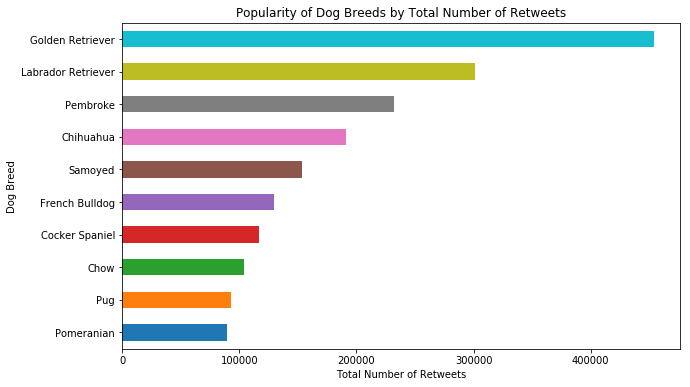

In [96]:
descending_rts = most_breed_rts[9::-1]
descending_rts.plot(kind = 'barh', title = 'Popularity of Dog Breeds by Total Number of Retweets', figsize = (10, 6))
plt.xlabel('Total Number of Retweets')
plt.ylabel('Dog Breed');

The most popular dog breeds by total number of retweets are as follows:
1. Golden Retriever
2. Labrador Retriever
3. Pembroke
4. Chihuahua
5. Samoyed
6. French Bulldog
7. Cocker Spaniel
8. Chow
9. Pug
10. Pomeranian

Retweets are typically more difficult to earn than favorites are on any given tweet. Viewing the top ten dog breeds by total number of retweets might be the best metric to judge breed popularity. The top four dog breeds remain unchanged when compared to dog breed popularity by total number of reviews. However, whereas before the Samoyed was the eighth most popular breed, here it is the fifth most popular. Coming in at sixth and seventh are the French Bulldog and Cocker Spaniel, respectively. These dogs were previously not in the top ten based on total number of reviews. The Chow moved from seventh to eighth and the Pug slipped from fifth to ninth. The Pomeranian breed dropped a spot to tenth here. Completely falling out of the top ten are the sixth most reviewed breed, the Toy Poodle, and the tenth most reviewed breed, the Malamute.

#### 3. Top 10 breeds by total number of favorites

In [97]:
most_breed_favorites = df.groupby('breed')['favorite_count'].sum().sort_values(ascending = False).head(10)
most_breed_favorites

breed
Golden Retriever      1602031
Labrador Retriever     995140
Pembroke               880614
Chihuahua              616597
French Bulldog         511487
Samoyed                469671
Chow                   376888
Cocker Spaniel         343287
Pug                    317122
Malamute               296808
Name: favorite_count, dtype: int64

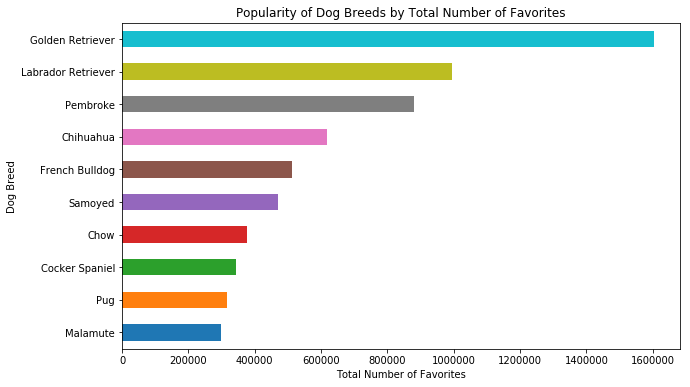

In [98]:
descending_favs = most_breed_favorites[9::-1]
descending_favs.plot(kind = 'barh', title = 'Popularity of Dog Breeds by Total Number of Favorites', figsize = (10, 6))
plt.xlabel('Total Number of Favorites')
plt.ylabel('Dog Breed');

The most popular dog breeds by total number of favorites are as follows:
1. Golden Retriever
2. Labrador Retriever
3. Pembroke
4. Chihuahua
5. French Bulldog
6. Samoyed
7. Chow
8. Cocker Spaniel
9. Pug
10. Malamute

While retweets might be the best metric to judge breed popularity, there is still some value in viewing the top ten dog breeds by total number of favorites. For instance, the top four breeds again remain unchanged. The French Bulldog and Samoyed trade spots, with the former now in the fifth position and the latter in the sixth. The Chow moves up a spot to seventh, equalling its position in the top ten most reviewed breeds. The Cocker Spaniel slides back to the eighth spot, while the Pug holds steady at ninth. Rounding out the top ten, the Malamute is back in the mix. This means the Pomeranian is on the outside looking in at this top ten list.

The Toy Poodle is the only dog breed from the ten most reviewed breeds that doesn't appear in the top ten list of either the most total retweets or most total favorites.

The dogs that are in each of the three top ten lists are as follows:
  - Golden Retriever
  - Labrador Retriever
  - Pembroke
  - Chihuahua
  - Samoyed
  - Chow
  - Pug

#### 4. URLs with pictures of the top 5 individual dogs by total number of favorites

In [99]:
df.groupby('jpg_url')['favorite_count'].max().sort_values(ascending = False).head(5)

jpg_url
https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg    141775
https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg                                            120648
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    109033
https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg                                            105894
https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg    104613
Name: favorite_count, dtype: int64

These URLs are direct links to .jpg files containing pictures of the actual dogs in the top five by total number of favorites. While all these reviews received over 100,000 favorites each, the top dog garnered 141,775 favorites.